In [206]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from scipy import stats
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras import optimizers 
from keras.utils.vis_utils import plot_model  
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns

### 读取数据

In [90]:
data_x=pd.read_csv('Result_x.csv',header=None)
data_y=pd.read_csv('Result.csv',header=None)

In [103]:
X=data_x.T
Y=data_y.iloc[:,0]

In [121]:
X.head

<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     1.563877  1.556981  1.550083  1.543187  1.536289  1.529393  1.515600   
1     1.529179  1.525540  1.521899  1.518258  1.514618  1.510978  1.503698   
2     1.565418  1.558147  1.550873  1.543602  1.536329  1.529058  1.514514   
3     1.572107  1.561649  1.551189  1.540732  1.530271  1.519814  1.498898   
4     1.565783  1.558414  1.551042  1.543673  1.536300  1.528931  1.514190   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.518884  1.515638  1.512390  1.509144  1.505896  1.502650  1.496156   
9996  0.293682  0.293689  0.293695  0.293702  0.293709  0.293715  0.293728   
9997  1.557814  1.551990  1.546163  1.540338  1.534512  1.528688  1.517037   
9998  1.573153  1.557568  1.541977  1.526392  1.510801  1.495216  1.464045   
9999  1.563379  1.556592  1.549804  1.543020  1.536230  1.529444  1.515869   

            7         8         9

In [105]:
Y.head

<bound method NDFrame.head of 0        54.4203
1        28.9398
2        57.3649
3        82.4079
4        58.1375
          ...   
9995     25.8862
9996      1.2035
9997     46.0135
9998    122.7582
9999     53.5593
Name: 0, Length: 10000, dtype: float64>

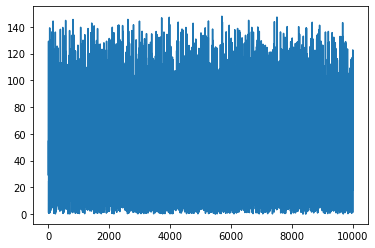

In [106]:
plt.plot(Y)

In [147]:
X_temp=X.values.reshape(-1,30)
Y_temp=Y.values.reshape(-1,1)
print(X_temp.shape)
print(Y_temp.shape)
min_max_scaler_x = preprocessing.MinMaxScaler()
X_all=min_max_scaler_x.fit_transform(X_temp)
min_max_scaler_y = preprocessing.MinMaxScaler()
Y_all=min_max_scaler_y.fit_transform(Y_temp) 

in_dim=X_all.shape[1]
out_dim=Y_all.shape[1]

xtrain, xtest, ytrain, ytest=train_test_split(X_all, Y_all, test_size=0.15)   

print("xtrain:",xtrain.shape)
print("ytrain:",ytrain.shape)
print("xtest:",xtest.shape)
print("ytest:",ytest.shape)

(10000, 30)
(10000, 1)
xtrain: (8500, 30)
ytrain: (8500, 1)
xtest: (1500, 30)
ytest: (1500, 1)


### 搭建网络

In [148]:
model=Sequential()

In [149]:
model.add(Dense(
    units=100,
    input_dim=in_dim,
    activation='relu',
    ))
model.add(Dense(
    units=100,
    activation='relu',
    ))
model.add(Dense(
    out_dim))

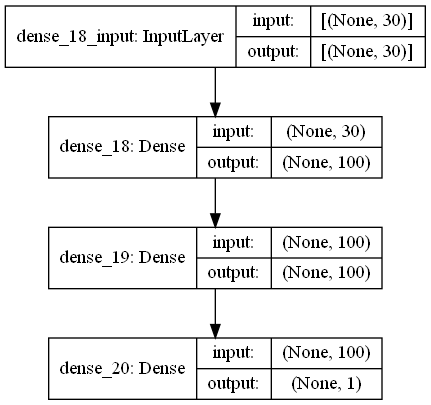

In [150]:
plot_model(model,show_shapes=True)

In [151]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.compile(loss="mse", optimizer="adam")

In [153]:
model.fit(xtrain, ytrain, epochs=100, batch_size=1000, verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 0.1123
Epoch 2/100
9/9 - 0s - loss: 0.0246
Epoch 3/100
9/9 - 0s - loss: 0.0113
Epoch 4/100
9/9 - 0s - loss: 0.0055
Epoch 5/100
9/9 - 0s - loss: 0.0033
Epoch 6/100
9/9 - 0s - loss: 0.0022
Epoch 7/100
9/9 - 0s - loss: 0.0017
Epoch 8/100
9/9 - 0s - loss: 0.0013
Epoch 9/100
9/9 - 0s - loss: 9.8466e-04
Epoch 10/100
9/9 - 0s - loss: 7.8209e-04
Epoch 11/100
9/9 - 0s - loss: 6.5377e-04
Epoch 12/100
9/9 - 0s - loss: 5.6505e-04
Epoch 13/100
9/9 - 0s - loss: 5.0124e-04
Epoch 14/100
9/9 - 0s - loss: 4.4946e-04
Epoch 15/100
9/9 - 0s - loss: 4.0631e-04
Epoch 16/100
9/9 - 0s - loss: 3.6888e-04
Epoch 17/100
9/9 - 0s - loss: 3.3681e-04
Epoch 18/100
9/9 - 0s - loss: 3.0910e-04
Epoch 19/100
9/9 - 0s - loss: 2.8498e-04
Epoch 20/100
9/9 - 0s - loss: 2.6391e-04
Epoch 21/100
9/9 - 0s - loss: 2.4270e-04
Epoch 22/100
9/9 - 0s - loss: 2.2283e-04
Epoch 23/100
9/9 - 0s - loss: 2.0643e-04
Epoch 24/100
9/9 - 0s - loss: 1.9187e-04
Epoch 25/100
9/9 - 0s - loss: 1.7872e-04
Epoch 26/100
9/9

In [155]:
ypred = model.predict(xtest) 

测试集预测电阻率结果

In [207]:
ypred_old=min_max_scaler_y.inverse_transform(ypred)
print(ypred_old)

[[43.322742]
 [68.14434 ]
 [38.828526]
 ...
 [51.102642]
 [44.768944]
 [57.37111 ]]


测试集真实电阻率

In [157]:
ytest_old=min_max_scaler_y.inverse_transform(ytest) 
print(ytest_old) 

[[43.4324]
 [68.2573]
 [38.9994]
 ...
 [51.0571]
 [44.9874]
 [57.5117]]


误差百分比

In [208]:
def mean_error(sig1,sig2):
    return np.abs(sig1-sig2)*100/sig2

In [209]:
error1=[]
for i in range(len(ytest_old)):
    error1.append(mean_error(float(ypred_old[i]),float(ytest_old[i])))

In [189]:
error1

[0.25247865151775656,
 0.16549070189310447,
 0.43814637350090196,
 0.0535100808136434,
 0.4525973725886693,
 0.8126948865398644,
 2.099710360880856,
 0.14497660496769915,
 0.36614070707686563,
 0.11068241367088255,
 0.17268370068219877,
 0.48005963864555834,
 0.17296739239585424,
 0.6034780395706288,
 0.2764860038931984,
 0.15023383410885877,
 0.19868973649761007,
 0.06060218925226566,
 0.030978289032553064,
 0.32134806345627315,
 0.13143200122554408,
 0.0916020709258147,
 0.02596679341487898,
 0.9191912022893488,
 0.2748565870000579,
 0.1840171146117322,
 0.5250588411810548,
 2.492409333053565,
 0.10182710077309448,
 0.052114816526050156,
 0.18769278615866603,
 1.118703085575107,
 0.09581950414425598,
 1.9776314189854147,
 0.004306401707546802,
 0.7412520595461501,
 0.297818116254933,
 0.2862126158056888,
 0.4421009793772084,
 0.18839567467737847,
 0.14802704204561193,
 0.17141705501735557,
 0.2300591611613624,
 0.45823305911191814,
 0.7388441998048382,
 0.21044615232551786,
 0.243187

<AxesSubplot:>

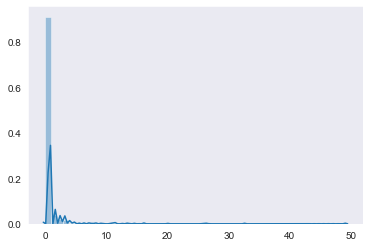

In [190]:
sns.set_style('dark')
sns.distplot(error1)

In [191]:
import plotly.express as px
df=pd.DataFrame(error1)
df.columns=['拟合误差(%)']
fig = px.line(df,y='拟合误差(%)')
#fig = px.bar(df, x=df.index, y='拟合误差')
#fig = px.area(df) 
fig.show() 

(array([1.341e+03, 6.000e+01, 3.300e+01, 2.700e+01, 8.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 6.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([5.30558266e-05, 9.82941987e-01, 1.96583092e+00, 2.94871985e+00,
        3.93160878e+00, 4.91449771e+00, 5.89738664e+00, 6.88027557e+00,
        7.86316450e+00, 8.84605343e+00, 9.82894236e+00, 1.08118313e+01,
        1.17947202e+01, 1.27776092e+01, 1.37604981e+01, 1.47433870e+01,
        1.57262759e+01, 1.67091649e+01, 1.76920538e+01, 1.86749427e+01,
        1.965783

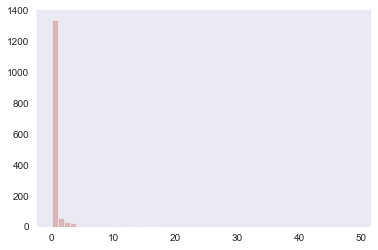

In [192]:

plt.hist(df, bins=50, color=sns.desaturate("indianred", .8), alpha=.4)

In [203]:
sections = [0,5,10,50,200]
group_names = ['1%','1%-%5','5%-%10','50%']
cuts = pd.cut(error1,sections,labels=group_names)
counts = pd.value_counts(cuts)
dict(counts) 

{'1%': 1470, '5%-%10': 18, '1%-%5': 12, '50%': 0}

<AxesSubplot:>

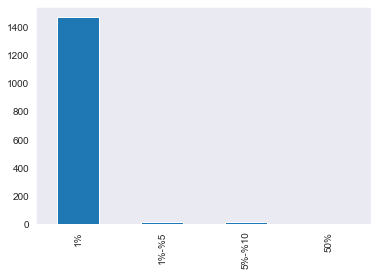

In [205]:
cuts.value_counts().plot(kind='bar')